In [1]:
import numpy as np
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale
# import NOTEARS
import notears.nt_linear as nt
import notears.nt_nonlinear as ntn
from sklearn.preprocessing import scale
from scipy.special import expit as sigmoid
import matplotlib as mpl
from cdt.metrics import SHD
import ges
from utils.scores import GaussObsL0Pen
from itertools import product

No GPU automatically detected. Setting SETTINGS.GPU to 0, and SETTINGS.NJOBS to cpu_count.


In [2]:
mpl.rcParams['font.family'] = 'Avenir'
plt.rcParams['font.size'] = 14
plt.rcParams['axes.linewidth'] = 2

# Manipulations
This notebook contains all possible manipulations on 3-node variable systems using varsortability. 

## ToC
1. Chains
    - Revert Chain
    - Introduce Fork
    - Introduce Collider
2. Forks
    - Convert Fork to Chain
    - Change Fork's origin
    - Introduce Collider
3. Colliders
    - Convert Collider into Fork
    - Convert Collider into Chain
    - Change Collider's sink node

In [3]:
SAMPLE_SIZE = 10000
NODE_SIZE = 2000
ARROW_SIZE = 20
LINEWIDTH = 1

In [4]:
hyperparams = {
    'nt': {
        'lambda1': 0.05,
        'loss_type': 'l2',
        'w_threshold': 0.3,
        'rho_max': 1e+16,
        'rand_init': True,
        'substract_variances': True,
    },
}

In [5]:
def learn_graph(algo='nt'):

    def ges_learning(data):
        score = GaussObsL0Pen(data, substract_var=True)
        est, _ = ges.fit(score, debug=True)
        #est, _ = ges.fit_bic(data)
        return est

    if algo == 'nt':
        return lambda data: nt.notears_linear(data, **hyperparams['nt'])
    elif algo == 'ges':
        return ges_learning

In [6]:
ALGO = 'ges' #'nt'

## 1. Chains

### Revert Chain

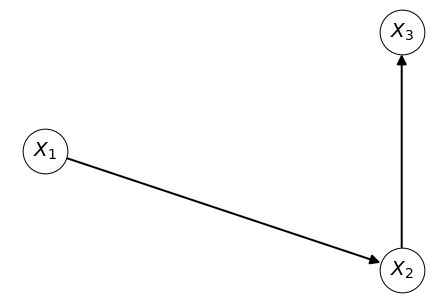

In [69]:
adj = np.array([[0, 1, 0],
                [0, 0, 1], 
                [0, 0, 0]])
G = nx.convert_matrix.from_numpy_array(adj, create_using=nx.DiGraph)
#fig = plt.figure(figsize=(5, 5))
labels = {node: fr"$X_{node + 1}$" for node in G.nodes}
#pos = {node: (1, node) for node in G.nodes}
nx.draw_shell(G, with_labels=True, node_size=NODE_SIZE, node_color='white', width=2, arrowsize=ARROW_SIZE, linewidths=LINEWIDTH, edgecolors='black', labels=labels, font_size=20)
plt.savefig('./figures/nt-imperfect-3-nodes/chain.pdf')


GES forward phase start
-------------------------
[0. 0. 0.]
[0. 0. 1.]
[0. 0. 0.]
5528.727638455219
[0. 1. 0.]
[0. 0. 1.]
[0. 0. 0.]
8954.955242985303
-----------------------
GES forward phase end
Total score: 8954.9552
[0. 1. 0.]
[0. 0. 1.]
[0. 0. 0.]

GES backward phase start
-------------------------
-----------------------
GES backward phase end
Total score: 8954.9552
[0. 1. 0.]
[0. 0. 1.]
[0. 0. 0.]

GES turning phase start
-------------------------
-----------------------
GES turning phase end
Total score: 8954.9552
[0. 1. 0.]
[0. 0. 1.]
[0. 0. 0.]


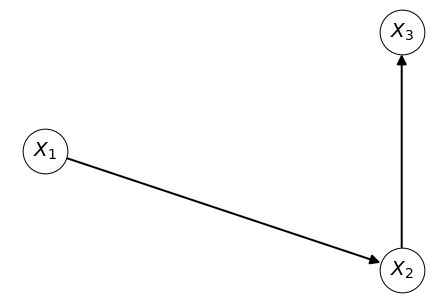

In [77]:
X_0 = np.random.normal(0, 1, SAMPLE_SIZE)
X1 = X_0 + np.random.normal(0, 1, SAMPLE_SIZE)
X2 = X1 + np.random.normal(0, 1, SAMPLE_SIZE)
gdata = np.array([X_0, X1, X2]).T

gdata = scale(gdata)

gdata[:, 0] *= 3
gdata[:, 1] *= 2

nt_pred = learn_graph(ALGO)(gdata)
nt_pred_nx = nx.convert_matrix.from_numpy_array(nt_pred, create_using=nx.DiGraph)
labels = {node: fr"$X_{node + 1}$" for node in G.nodes}
nx.draw_shell(nt_pred_nx, with_labels=True, node_size=NODE_SIZE, node_color='white', width=2, arrowsize=ARROW_SIZE, linewidths=LINEWIDTH, edgecolors='black', labels=labels, font_size=20)
plt.savefig('./figures/nt-imperfect-3-nodes/chain_reverse.pdf')

### Create Fork

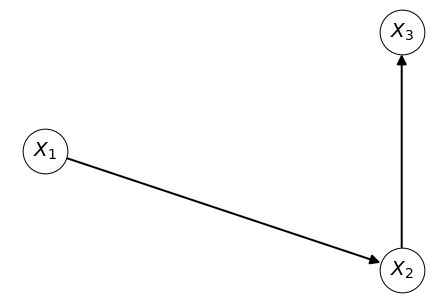

In [78]:
adj = np.array([[0, 1, 0],
                [0, 0, 1], 
                [0, 0, 0]])
G = nx.convert_matrix.from_numpy_array(adj, create_using=nx.DiGraph)
labels = {node: fr"$X_{node + 1}$" for node in G.nodes}
#pos = {node: (1, node) for node in G.nodes}
nx.draw_shell(G, with_labels=True, node_size=NODE_SIZE, node_color='white', width=2, arrowsize=ARROW_SIZE, linewidths=LINEWIDTH, edgecolors='black', labels=labels, font_size=20)


GES forward phase start
-------------------------
[0. 0. 0.]
[0. 0. 0.]
[0. 1. 0.]
5690.598426137049
[0. 0. 0.]
[1. 0. 0.]
[0. 1. 0.]
9236.789814222717
-----------------------
GES forward phase end
Total score: 9236.7898
[0. 0. 0.]
[1. 0. 0.]
[0. 1. 0.]

GES backward phase start
-------------------------
-----------------------
GES backward phase end
Total score: 9236.7898
[0. 0. 0.]
[1. 0. 0.]
[0. 1. 0.]

GES turning phase start
-------------------------
-----------------------
GES turning phase end
Total score: 9236.7898
[0. 0. 0.]
[1. 0. 0.]
[0. 1. 0.]


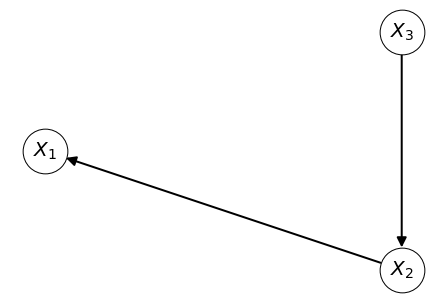

In [97]:
X_0 = np.random.normal(0, 1, SAMPLE_SIZE)
X1 = X_0 + np.random.normal(0, 1, SAMPLE_SIZE)
X2 = X1 + np.random.normal(0, 1, SAMPLE_SIZE)
gdata = np.array([X_0, X1, X2]).T
gdata = scale(gdata)

#gdata[:, 1] *= 0.5
gdata[:, 0] *= 2

nt_pred = learn_graph(ALGO)(gdata)
nt_pred_nx = nx.convert_matrix.from_numpy_array(nt_pred, create_using=nx.DiGraph)
labels = {node: fr"$X_{node + 1}$" for node in G.nodes}
pos = {node: (1, node) for node in G.nodes}
nx.draw_shell(nt_pred_nx, with_labels=True, node_size=NODE_SIZE, node_color='white', width=2, arrowsize=ARROW_SIZE, linewidths=LINEWIDTH, edgecolors='black', labels=labels, font_size=20)
plt.savefig('./figures/nt-imperfect-3-nodes/chain2fork.pdf')

### Creating Collider

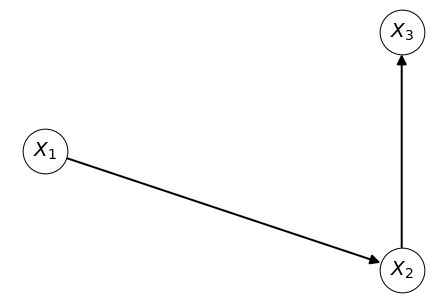

In [98]:
adj = np.array([[0, 1, 0],
                [0, 0, 1], 
                [0, 0, 0]])
G = nx.convert_matrix.from_numpy_array(adj, create_using=nx.DiGraph)
labels = {node: fr"$X_{node + 1}$" for node in G.nodes}
pos = {node: (node, 1) for node in G.nodes}
nx.draw_shell(G, with_labels=True, node_size=NODE_SIZE, node_color='white', width=2, arrowsize=ARROW_SIZE, linewidths=LINEWIDTH, edgecolors='black', labels=labels, font_size=20)
#plt.savefig('./figures/nt-predictions-3-nodes/chain2collider.pdf')


GES forward phase start
-------------------------
[0. 0. 0.]
[0. 0. 0.]
[0. 1. 0.]
5610.973854430411
[0. 0. 0.]
[1. 0. 0.]
[0. 1. 0.]
9025.945642471981
-----------------------
GES forward phase end
Total score: 9025.9456
[0. 0. 0.]
[1. 0. 0.]
[0. 1. 0.]

GES backward phase start
-------------------------
-----------------------
GES backward phase end
Total score: 9025.9456
[0. 0. 0.]
[1. 0. 0.]
[0. 1. 0.]

GES turning phase start
-------------------------
-----------------------
GES turning phase end
Total score: 9025.9456
[0. 0. 0.]
[1. 0. 0.]
[0. 1. 0.]


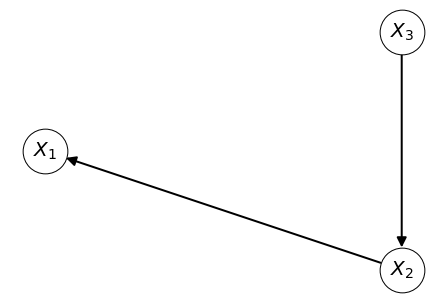

In [14]:
X_0 = np.random.normal(0, 1, SAMPLE_SIZE)
X1 = X_0 + np.random.normal(0, 1, SAMPLE_SIZE)
X2 = X1 + np.random.normal(0, 1, SAMPLE_SIZE)
gdata = np.array([X_0, X1, X2]).T
#gdata = scale(gdata)

gdata[:, 2] *= 0.5
gdata[:, 1] *= 3

nt_pred = learn_graph(ALGO)(gdata)
nt_pred_nx = nx.convert_matrix.from_numpy_array(nt_pred, create_using=nx.DiGraph)
labels = {node: fr"$X_{node + 1}$" for node in G.nodes}
edge_colors = ['black' if edge != (0, 2) else 'red' for edge in nt_pred_nx.edges]
nx.draw_shell(nt_pred_nx, with_labels=True, node_size=NODE_SIZE, node_color='white', width=2, arrowsize=ARROW_SIZE, linewidths=LINEWIDTH, edgecolors='black', labels=labels, font_size=20)
plt.savefig('./figures/nt-imperfect-3-nodes/chain2collider.pdf')

## 2. Forks

### Fork2Chain

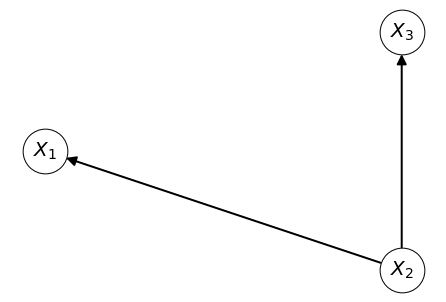

In [99]:
adj = np.array([[0, 0, 0],
                [1, 0, 1], 
                [0, 0, 0]])
G = nx.convert_matrix.from_numpy_array(adj, create_using=nx.DiGraph)
labels = {node: fr"$X_{node + 1}$" for node in G.nodes}
nx.draw_shell(G, with_labels=True, node_size=NODE_SIZE, node_color='white', width=2, arrowsize=ARROW_SIZE, linewidths=LINEWIDTH, edgecolors='black', labels=labels, font_size=20)
plt.savefig('./figures/nt-imperfect-3-nodes/fork.pdf')


GES forward phase start
-------------------------
[0. 1. 0.]
[0. 0. 0.]
[0. 0. 0.]
3511.924184971769
[0. 1. 0.]
[0. 0. 1.]
[0. 0. 0.]
6882.87763838924
-----------------------
GES forward phase end
Total score: 6882.8776
[0. 1. 0.]
[0. 0. 1.]
[0. 0. 0.]

GES backward phase start
-------------------------
-----------------------
GES backward phase end
Total score: 6882.8776
[0. 1. 0.]
[0. 0. 1.]
[0. 0. 0.]

GES turning phase start
-------------------------
-----------------------
GES turning phase end
Total score: 6882.8776
[0. 1. 0.]
[0. 0. 1.]
[0. 0. 0.]


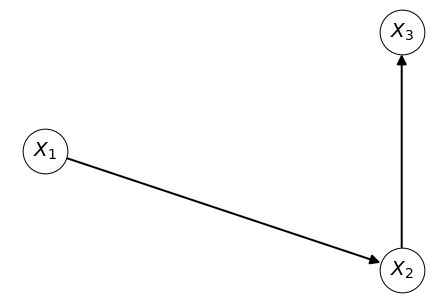

In [110]:
X1 = np.random.normal(0, 1, SAMPLE_SIZE)
X0 = X1 + np.random.normal(0, 1, SAMPLE_SIZE)
X2 = X1 + np.random.normal(0, 1, SAMPLE_SIZE)
gdata = np.array([X0, X1, X2]).T
gdata = scale(gdata)

gdata[:, 1] *= 3
gdata[:, 0] *= 2

nt_pred = learn_graph(ALGO)(gdata)
nt_pred_nx = nx.convert_matrix.from_numpy_array(nt_pred, create_using=nx.DiGraph)
labels = {node: fr"$X_{node + 1}$" for node in G.nodes}
nx.draw_shell(nt_pred_nx, with_labels=True, node_size=NODE_SIZE, node_color='white', width=2, arrowsize=ARROW_SIZE, linewidths=LINEWIDTH, edgecolors='black', labels=labels, font_size=20)
plt.savefig('./figures/nt-imperfect-3-nodes/fork2chain.pdf')

### Change Fork origin

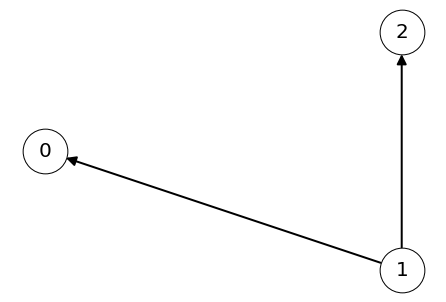

In [111]:
adj = np.array([[0, 0, 0],
                [1, 0, 1], 
                [0, 0, 0]])
G = nx.convert_matrix.from_numpy_array(adj, create_using=nx.DiGraph)
nx.draw_shell(G, with_labels=True, node_size=NODE_SIZE, node_color='white', width=2, arrowsize=ARROW_SIZE, linewidths=LINEWIDTH, edgecolors='black', font_size=20)


GES forward phase start
-------------------------
[0. 0. 0.]
[0. 0. 1.]
[0. 0. 0.]
3477.202593179707
[0. 1. 0.]
[0. 0. 1.]
[0. 0. 0.]
6903.063816415383
-----------------------
GES forward phase end
Total score: 6903.0638
[0. 1. 0.]
[0. 0. 1.]
[0. 0. 0.]

GES backward phase start
-------------------------
-----------------------
GES backward phase end
Total score: 6903.0638
[0. 1. 0.]
[0. 0. 1.]
[0. 0. 0.]

GES turning phase start
-------------------------
-----------------------
GES turning phase end
Total score: 6903.0638
[0. 1. 0.]
[0. 0. 1.]
[0. 0. 0.]


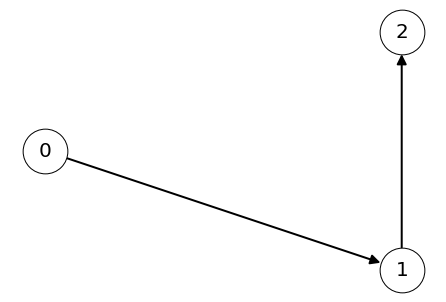

In [120]:
X1 = np.random.normal(0, 1, SAMPLE_SIZE)
X0 = X1 + np.random.normal(0, 1, SAMPLE_SIZE)
X2 = X1 + np.random.normal(0, 1, SAMPLE_SIZE)
gdata = np.array([X0, X1, X2]).T
gdata = scale(gdata)

gdata[:, 1] *= 2
gdata[:, 2] *= 2

nt_pred = learn_graph(ALGO)(gdata)
nt_pred_nx = nx.convert_matrix.from_numpy_array(nt_pred, create_using=nx.DiGraph)
nx.draw_shell(nt_pred_nx, with_labels=True, node_size=NODE_SIZE, node_color='white', width=2, arrowsize=ARROW_SIZE, linewidths=LINEWIDTH, edgecolors='black', font_size=20)

### Fork2Collider

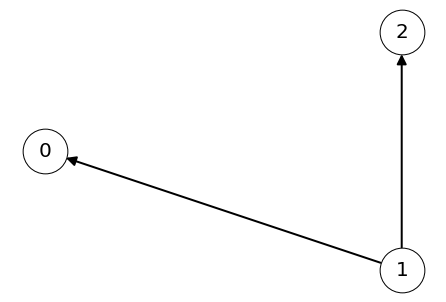

In [121]:
adj = np.array([[0, 0, 0],
                [1, 0, 1], 
                [0, 0, 0]])
G = nx.convert_matrix.from_numpy_array(adj, create_using=nx.DiGraph)
nx.draw_shell(G, with_labels=True, node_size=NODE_SIZE, node_color='white', width=2, arrowsize=ARROW_SIZE, linewidths=LINEWIDTH, edgecolors='black', font_size=20)


GES forward phase start
-------------------------
[0. 0. 0.]
[0. 0. 1.]
[0. 0. 0.]
3587.299415997227
[0. 1. 0.]
[0. 0. 1.]
[0. 0. 0.]
7093.393231678785
-----------------------
GES forward phase end
Total score: 7093.3932
[0. 1. 0.]
[0. 0. 1.]
[0. 0. 0.]

GES backward phase start
-------------------------
-----------------------
GES backward phase end
Total score: 7093.3932
[0. 1. 0.]
[0. 0. 1.]
[0. 0. 0.]

GES turning phase start
-------------------------
-----------------------
GES turning phase end
Total score: 7093.3932
[0. 1. 0.]
[0. 0. 1.]
[0. 0. 0.]


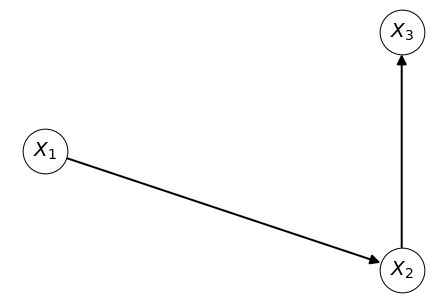

In [129]:
X1 = np.random.normal(0, 1, SAMPLE_SIZE)
X0 = X1 + np.random.normal(0, 1, SAMPLE_SIZE)
X2 = X1 + np.random.normal(0, 1, SAMPLE_SIZE)
gdata = np.array([X0, X1, X2]).T
gdata = scale(gdata)

gdata[:, 1] *= 2

nt_pred = learn_graph(ALGO)(gdata)
nt_pred_nx = nx.convert_matrix.from_numpy_array(nt_pred, create_using=nx.DiGraph)
labels = {node: fr"$X_{node + 1}$" for node in G.nodes}
nx.draw_shell(nt_pred_nx, with_labels=True, node_size=NODE_SIZE, node_color='white', width=2, arrowsize=ARROW_SIZE, linewidths=LINEWIDTH, edgecolors='black', labels=labels, font_size=20)
plt.savefig('./figures/nt-imperfect-3-nodes/fork2collider.pdf')

## Colliders

### Collider2Chain

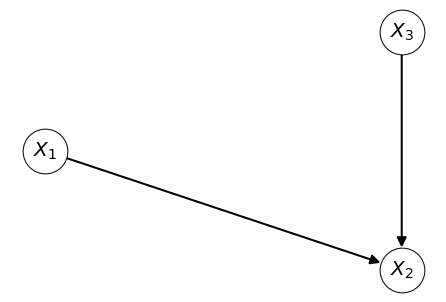

In [130]:
adj = np.array([[0, 1, 0],
                [0, 0, 0], 
                [0, 1, 0]])
G = nx.convert_matrix.from_numpy_array(adj, create_using=nx.DiGraph)
{node: fr"$X_{node + 1}$" for node in G.nodes}
nx.draw_shell(G, with_labels=True, node_size=NODE_SIZE, node_color='white', width=2, arrowsize=ARROW_SIZE, linewidths=LINEWIDTH, edgecolors='black', labels=labels, font_size=20)
plt.savefig('./figures/nt-imperfect-3-nodes/collider.pdf')


GES forward phase start
-------------------------
[0. 0. 0.]
[0. 0. 0.]
[0. 1. 0.]
1989.8430295590815
[0. 1. 0.]
[0. 0. 0.]
[0. 1. 0.]
5388.336040716833
-----------------------
GES forward phase end
Total score: 5388.3360
[0. 1. 0.]
[0. 0. 0.]
[0. 1. 0.]

GES backward phase start
-------------------------
-----------------------
GES backward phase end
Total score: 5388.3360
[0. 1. 0.]
[0. 0. 0.]
[0. 1. 0.]

GES turning phase start
-------------------------
-----------------------
GES turning phase end
Total score: 5388.3360
[0. 1. 0.]
[0. 0. 0.]
[0. 1. 0.]


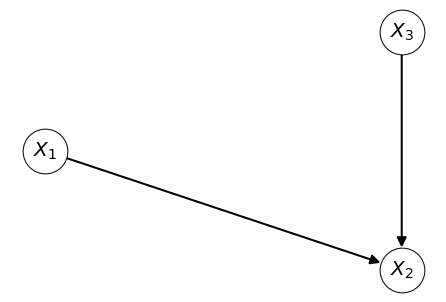

In [153]:
X0 = np.random.normal(0, 1, SAMPLE_SIZE)
X2 = np.random.normal(0, 1, SAMPLE_SIZE)
X1 = X0 + X2 + np.random.normal(0, 1, SAMPLE_SIZE)
gdata = np.array([X0, X1, X2]).T
gdata = scale(gdata)

#gdata[:, 2] *= 3
gdata[:, 0] *= 2

nt_pred = learn_graph(ALGO)(gdata)
{node: fr"$X_{node + 1}$" for node in G.nodes}
nt_pred_nx = nx.convert_matrix.from_numpy_array(nt_pred, create_using=nx.DiGraph)
nx.draw_shell(nt_pred_nx, with_labels=True, node_size=NODE_SIZE, node_color='white', width=2, arrowsize=ARROW_SIZE, linewidths=LINEWIDTH, edgecolors='black', labels=labels, font_size=20)
plt.savefig('./figures/nt-imperfect-3-nodes/collider2chain.pdf')

### Collider2Fork

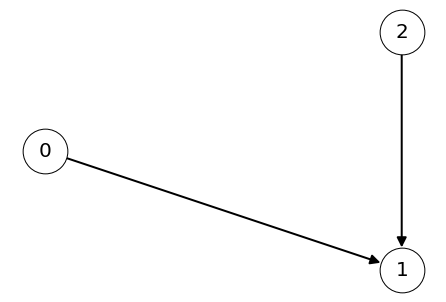

In [154]:
adj = np.array([[0, 1, 0],
                [0, 0, 0], 
                [0, 1, 0]])
G = nx.convert_matrix.from_numpy_array(adj, create_using=nx.DiGraph)
nx.draw_shell(G, with_labels=True, node_size=NODE_SIZE, node_color='white', width=2, arrowsize=ARROW_SIZE, linewidths=LINEWIDTH, edgecolors='black', font_size=20)


GES forward phase start
-------------------------
[0. 0. 0.]
[0. 0. 0.]
[0. 1. 0.]
2069.6194000049372
[0. 1. 0.]
[0. 0. 0.]
[0. 1. 0.]
5435.176498993696
-----------------------
GES forward phase end
Total score: 5435.1765
[0. 1. 0.]
[0. 0. 0.]
[0. 1. 0.]

GES backward phase start
-------------------------
-----------------------
GES backward phase end
Total score: 5435.1765
[0. 1. 0.]
[0. 0. 0.]
[0. 1. 0.]

GES turning phase start
-------------------------
-----------------------
GES turning phase end
Total score: 5435.1765
[0. 1. 0.]
[0. 0. 0.]
[0. 1. 0.]


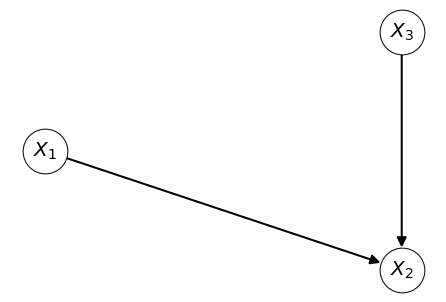

In [171]:
X0 = np.random.normal(0, 1, SAMPLE_SIZE)
X2 = np.random.normal(0, 1, SAMPLE_SIZE)
X1 = X0 + X2 + np.random.normal(0, 1, SAMPLE_SIZE)
gdata = np.array([X0, X1, X2]).T
gdata = scale(gdata)

#gdata[:, 2] *= 2
gdata[:, 0] *= 2

nt_pred = learn_graph(ALGO)(gdata)
nt_pred_nx = nx.convert_matrix.from_numpy_array(nt_pred, create_using=nx.DiGraph)
{node: fr"$X_{node + 1}$" for node in G.nodes}
nx.draw_shell(nt_pred_nx, with_labels=True, node_size=NODE_SIZE, node_color='white', width=2, arrowsize=ARROW_SIZE, linewidths=LINEWIDTH, edgecolors='black', labels=labels, font_size=20)
plt.savefig('./figures/nt-imperfect-3-nodes/collider2fork.pdf')

### Change Collider sink node

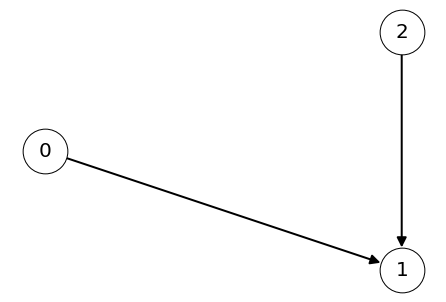

In [172]:
adj = np.array([[0, 1, 0],
                [0, 0, 0], 
                [0, 1, 0]])
G = nx.convert_matrix.from_numpy_array(adj, create_using=nx.DiGraph)
nx.draw_shell(G, with_labels=True, node_size=NODE_SIZE, node_color='white', width=2, arrowsize=ARROW_SIZE, linewidths=LINEWIDTH, edgecolors='black', font_size=20)


GES forward phase start
-------------------------
[0. 1. 0.]
[0. 0. 0.]
[0. 0. 0.]
2094.5096356644854
[0. 1. 0.]
[0. 0. 0.]
[0. 1. 0.]
5401.1274599524
-----------------------
GES forward phase end
Total score: 5401.1275
[0. 1. 0.]
[0. 0. 0.]
[0. 1. 0.]

GES backward phase start
-------------------------
-----------------------
GES backward phase end
Total score: 5401.1275
[0. 1. 0.]
[0. 0. 0.]
[0. 1. 0.]

GES turning phase start
-------------------------
-----------------------
GES turning phase end
Total score: 5401.1275
[0. 1. 0.]
[0. 0. 0.]
[0. 1. 0.]


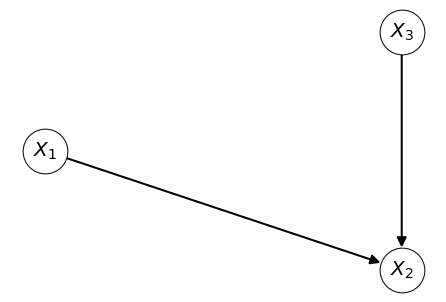

In [194]:
X0 = np.random.normal(0, 1, SAMPLE_SIZE)
X2 = np.random.normal(0, 1, SAMPLE_SIZE)
X1 = X0 + X2 + np.random.normal(0, 1, SAMPLE_SIZE)
gdata = np.array([X0, X1, X2]).T
gdata = scale(gdata)

#gdata[:, 0] *= 2

nt_pred = learn_graph(ALGO)(gdata)
nt_pred_nx = nx.convert_matrix.from_numpy_array(nt_pred, create_using=nx.DiGraph)
labels = {node: fr"$X_{node + 1}$" for node in G.nodes}
nx.draw_shell(nt_pred_nx, with_labels=True, node_size=NODE_SIZE, node_color='white', width=2, arrowsize=ARROW_SIZE, linewidths=LINEWIDTH, edgecolors='black', labels=labels, font_size=20)
plt.savefig('./figures/nt-imperfect-3-nodes/collider2collider.pdf')

findfont: Font family ['Avenir'] not found. Falling back to DejaVu Sans.


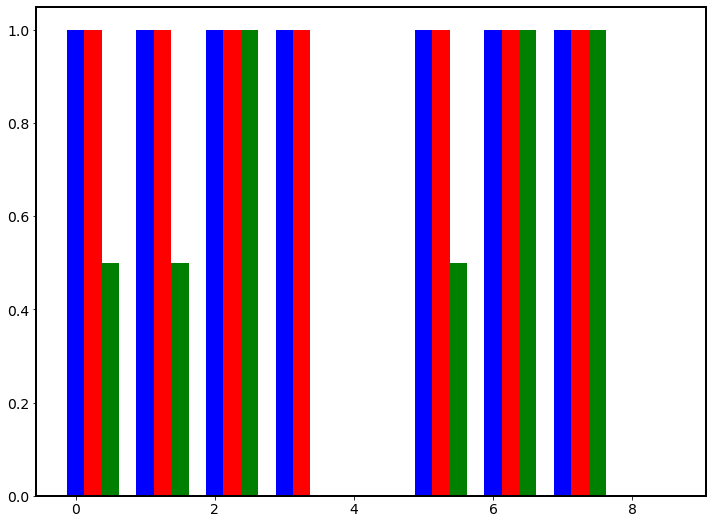

In [3]:
x_ = ['c2rc', 'c2f', 'c2co', 'f2c', 'f2f', 'f2co', 'co2c', 'co2f', 'co2co']
y = [[1, 1, 1, 1, 0, 1, 1, 1, 0], [1, 1, 1, 1, 0, 1, 1, 1, 0], [0.5, 0.5, 1, 0, 0, 0.5, 1, 1, 0]]
x = np.arange(len(x_))
fig = plt.figure(figsize=(12, 9))
plt.bar(x + 0, y[0], color='b', width=0.25)
plt.bar(x + 0.25, y[1], color='r', width=0.25)
plt.bar(x + 0.5, y[2], color='g', width=0.25)
plt.show()

## Perfect Scenario: 10 nodes

In [195]:
def rescale(data, scales_dict, resacle=True):
    if resacle:
        sdata = scale(data)
    else:
        sdata = data
    for idx, s in scales_dict.items():
        sdata[:, idx] *= s
    return sdata

In [196]:
def create_n_node_chain(num_nodes, noise, f):
    data = []
    x = noise()
    for i in range(num_nodes):
        x = f(np.copy(x)) + noise()
        data.append(x)
    return np.stack(data).T

In [197]:
def create_10_nodes_fork(orig_node, noise, f):
    assert orig_node < 9 and orig_node > 0, 'Fork origin must not be any outer node'
    x = noise()
    data = np.zeros((SAMPLE_SIZE, 10))
    data[:, orig_node] = x
    for i in np.arange(orig_node - 1, -1, -1):
        data[:, i] = f(data[:, i + 1]) + noise()
    for i in np.arange(orig_node + 1, 10):
        data[:, i] = f(data[:, i - 1]) + noise()
    return np.stack(data)

In [198]:
def create_10_nodes_collider(coll_node, noise, f):
    assert coll_node < 9 and coll_node > 0, 'Collider must not be any outer node'
    x_l, x_r = noise(), noise()
    data = np.zeros((SAMPLE_SIZE, 10))
    data[:, 0] = x_l
    data[:, -1] = x_r
    for i in np.arange(1, coll_node):
        data[:, i] = f(data[:, i - 1]) + noise()
    for i in np.arange(8, coll_node, -1):
        data[:, i] = f(data[:, i + 1]) + noise()
    data[:, coll_node] = f(data[:, coll_node - 1] + data[:, coll_node + 1]) + noise()
    return np.stack(data)

In [199]:
def f(data):
    return 1.2 * data

In [200]:
DATA_DIR = './data/gran-dag/10-vars-non-linear-scaled/'

In [201]:
hyperparams = {
    'nt': {
        'lambda1': 0.05,
        'loss_type': 'l2',
        'w_threshold': 0.3,
        'rho_max': 1e+16,
        'rand_init': True,
        'substract_variances': True
    },
}

## Chains

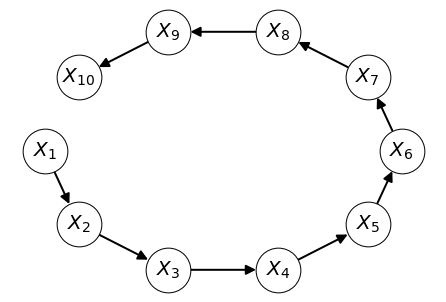

In [202]:
adj = np.zeros((10, 10))
for i in range(0, 9):
    adj[i, i+1] = 1
nt_pred_nx = nx.convert_matrix.from_numpy_array(adj, create_using=nx.DiGraph)
labels = {node: fr"$X_{{{node + 1}}}$" for node in nt_pred_nx.nodes}
nx.draw_shell(nt_pred_nx, with_labels=True, node_size=NODE_SIZE, node_color='white', width=2, arrowsize=ARROW_SIZE, linewidths=LINEWIDTH, edgecolors='black', labels=labels, font_size=20)
plt.savefig('./chain.pdf')


GES forward phase start
-------------------------
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
24022.92244903326
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
46129.7707429874
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
[0. 0. 0. 0. 0. 0.

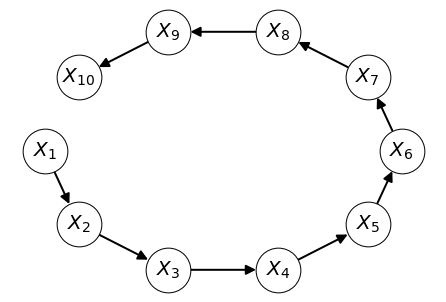

In [214]:
# reverse chain
data = create_n_node_chain(10, lambda: np.random.normal(0, 1, SAMPLE_SIZE), f)
#scale_dict = {i: s for i, s in enumerate(np.arange(18, 0, -2))}
scale_dict = {0: 8}
scaled_data = rescale(data, {}, True)
scaled_data = rescale(data, scale_dict)

nt_pred_scaled = learn_graph(ALGO)(scaled_data)
nt_pred_nx = nx.convert_matrix.from_numpy_array(nt_pred_scaled, create_using=nx.DiGraph)
labels = {node: fr"$X_{{{node + 1}}}$" for node in nt_pred_nx.nodes}
nx.draw_shell(nt_pred_nx, with_labels=True, node_size=NODE_SIZE, node_color='white', width=2, arrowsize=ARROW_SIZE, linewidths=LINEWIDTH, edgecolors='black', labels=labels, font_size=20)
plt.savefig('./chain_reverse.pdf')


GES forward phase start
-------------------------
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
23909.209387205057
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
46135.52548475526
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
[0. 0. 0. 0. 0. 

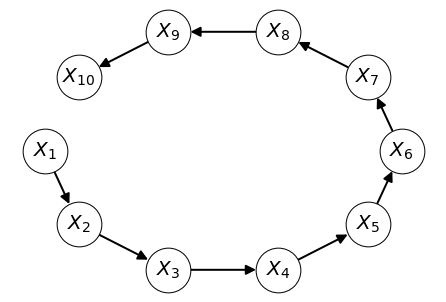

In [229]:
# introduce fork
data = create_n_node_chain(10, lambda: np.random.normal(0, 1, SAMPLE_SIZE), f)
#scale_dict = {0: 4.5, 1: 4, 2: 3.5, 3: 3, 4: 2, 5: 1, 6: 2, 7: 3, 8: 3.5, 9: 4}
scale_dict = {5: 1/3}
scaled_data = rescale(data, {}, True)
#scaled_data = rescale(data, scale_dict)

nt_pred_scaled = learn_graph(ALGO)(scaled_data)
nt_pred_nx = nx.convert_matrix.from_numpy_array(nt_pred_scaled, create_using=nx.DiGraph)
labels = {node: fr"$X_{{{node + 1}}}$" for node in nt_pred_nx.nodes}
nx.draw_shell(nt_pred_nx, with_labels=True, node_size=NODE_SIZE, node_color='white', width=2, arrowsize=ARROW_SIZE, linewidths=LINEWIDTH, edgecolors='black', labels=labels, font_size=20)
plt.savefig('./chain2fork.pdf')


GES forward phase start
-------------------------
 new_A = [[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
24045.23733245208
 new_A = [[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.

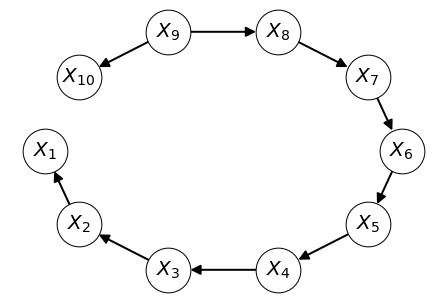

In [149]:
# introduce collider
data = create_n_node_chain(10, lambda: np.random.normal(0, 1, SAMPLE_SIZE), f)
scale_dict = {0: 1, 1: 2, 2: 3, 3: 4, 4: 5, 5: 8, 6: 5, 7: 4, 8: 3, 9: 2}
#scale_dict = {5: 16}
scaled_data = rescale(data, scale_dict, True)
#scaled_data = rescale(data, {}, True)

nt_pred_scaled = learn_graph(ALGO)(scaled_data)
nt_pred_nx = nx.convert_matrix.from_numpy_array(nt_pred_scaled, create_using=nx.DiGraph)
labels = {node: fr"$X_{{{node + 1}}}$" for node in nt_pred_nx.nodes}
nx.draw_shell(nt_pred_nx, with_labels=True, node_size=NODE_SIZE, node_color='white', width=2, arrowsize=ARROW_SIZE, linewidths=LINEWIDTH, edgecolors='black', labels=labels, font_size=20)
plt.savefig('./chain2collider.svg')

## Forks


GES forward phase start
-------------------------
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
14344.116188922631
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
26620.75112112992
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 

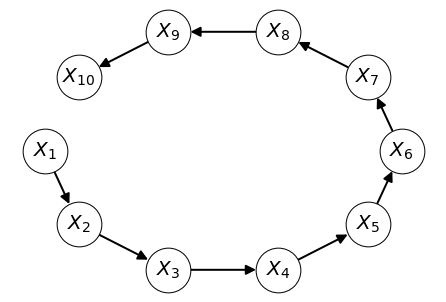

In [248]:
data = create_10_nodes_fork(5, lambda: np.random.normal(0, 1, SAMPLE_SIZE), f)
nt_pred_scaled = learn_graph(ALGO)(scaled_data)
nt_pred_nx = nx.convert_matrix.from_numpy_array(nt_pred_scaled, create_using=nx.DiGraph)
labels = {node: fr"$X_{{{node + 1}}}$" for node in nt_pred_nx.nodes}
nx.draw_shell(nt_pred_nx, with_labels=True, node_size=NODE_SIZE, node_color='white', width=2, arrowsize=ARROW_SIZE, linewidths=LINEWIDTH, edgecolors='black', labels=labels, font_size=20)
plt.savefig('./fork.pdf')


GES forward phase start
-------------------------
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
14552.774672892563
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
27002.276238119724
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0.

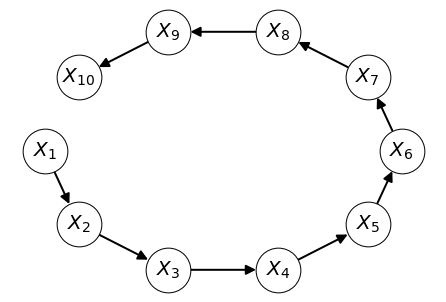

In [252]:
# fork to chain
data = create_10_nodes_fork(5, lambda: np.random.normal(0, 1, SAMPLE_SIZE), f)
#scale_dict = {i: s for i, s in enumerate(np.arange(18, 0, -2))}
scale_dict = {0: 8}
scaled_data = rescale(data, {}, True)
scaled_data = rescale(data, scale_dict, True)

nt_pred_scaled = learn_graph(ALGO)(scaled_data)
nt_pred_nx = nx.convert_matrix.from_numpy_array(nt_pred_scaled, create_using=nx.DiGraph)
labels = {node: fr"$X_{{{node + 1}}}$" for node in nt_pred_nx.nodes}
nx.draw_shell(nt_pred_nx, with_labels=True, node_size=NODE_SIZE, node_color='white', width=2, arrowsize=ARROW_SIZE, linewidths=LINEWIDTH, edgecolors='black', labels=labels, font_size=20)
plt.savefig('./fork2chain.pdf')


GES forward phase start
-------------------------
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
14530.311901970574
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
26916.117653996156
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0.

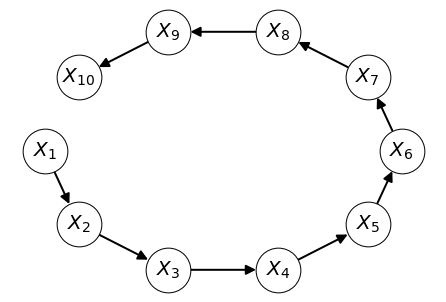

In [282]:
# fork to collider
data = create_10_nodes_fork(5, lambda: np.random.normal(0, 1, SAMPLE_SIZE), f)
#scale_dict = {0: 1, 1: 2, 2: 4, 3: 6, 4: 8, 5: 10, 6: 8, 7: 6, 8: 4, 9: 2}
scale_dict = {5: 6}
scaled_data = rescale(data, {}, True)
#scaled_data = rescale(data, scale_dict)

nt_pred_scaled = learn_graph(ALGO)(scaled_data)
nt_pred_nx = nx.convert_matrix.from_numpy_array(nt_pred_scaled, create_using=nx.DiGraph)
labels = {node: fr"$X_{{{node + 1}}}$" for node in nt_pred_nx.nodes}
nx.draw_shell(nt_pred_nx, with_labels=True, node_size=NODE_SIZE, node_color='white', width=2, arrowsize=ARROW_SIZE, linewidths=LINEWIDTH, edgecolors='black', labels=labels, font_size=20)
plt.savefig('./fork2collider.pdf')


GES forward phase start
-------------------------
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
14479.373401079307
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
26676.389743358326
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[1. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0.

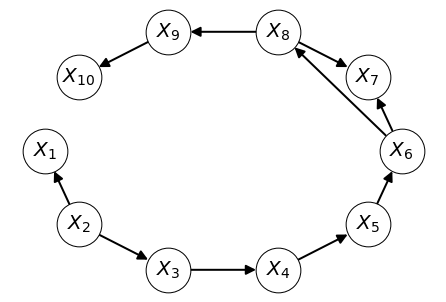

In [272]:
# fork to fork
data = create_10_nodes_fork(5, lambda: np.random.normal(0, 1, SAMPLE_SIZE), f)
scale_dict = {0: 14, 1: 12, 2: 10, 3: 8, 4: 6, 5: 4, 6: 1, 7: 2, 8: 4, 9: 6}
scale_dict = {6: 0.2, 5: 2}
scaled_data = rescale(data, {}, True)
scaled_data = rescale(data, scale_dict, False)

nt_pred_scaled = learn_graph(ALGO)(scaled_data)
nt_pred_nx = nx.convert_matrix.from_numpy_array(nt_pred_scaled, create_using=nx.DiGraph)
labels = {node: fr"$X_{{{node + 1}}}$" for node in nt_pred_nx.nodes}
nx.draw_shell(nt_pred_nx, with_labels=True, node_size=NODE_SIZE, node_color='white', width=2, arrowsize=ARROW_SIZE, linewidths=LINEWIDTH, edgecolors='black', labels=labels, font_size=20)
plt.savefig('./fork2fork.pdf')

## Colliders


GES forward phase start
-------------------------
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
14530.311901970574
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
26916.117653996156
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0.

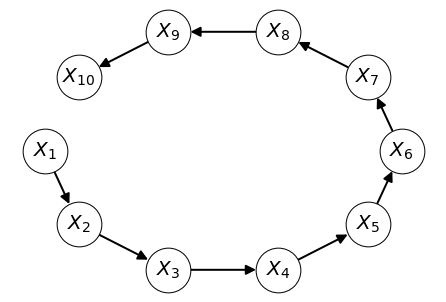

In [283]:
data = create_10_nodes_collider(5, lambda: np.random.normal(0, 1, SAMPLE_SIZE), f)
nt_pred_scaled = learn_graph(ALGO)(scaled_data)
nt_pred_nx = nx.convert_matrix.from_numpy_array(nt_pred_scaled, create_using=nx.DiGraph)
labels = {node: fr"$X_{{{node + 1}}}$" for node in nt_pred_nx.nodes}
nx.draw_shell(nt_pred_nx, with_labels=True, node_size=NODE_SIZE, node_color='white', width=2, arrowsize=ARROW_SIZE, linewidths=LINEWIDTH, edgecolors='black', labels=labels, font_size=20)
plt.savefig('./collider.pdf')


GES forward phase start
-------------------------
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
12437.851586185905
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
22567.059353472298
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0.

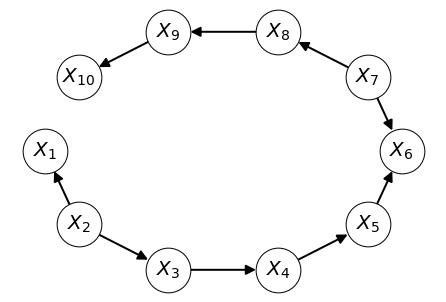

In [292]:
# collider to chain
data = create_10_nodes_collider(5, lambda: np.random.normal(0, 1, SAMPLE_SIZE), f)
scale_dict = {i: s for i, s in enumerate(np.arange(18, 0, -2))}
scale_dict = {0: 8} 
scaled_data = rescale(data, {}, True)
#scaled_data = rescale(data, scale_dict)

nt_pred_scaled = learn_graph(ALGO)(scaled_data)
nt_pred_nx = nx.convert_matrix.from_numpy_array(nt_pred_scaled, create_using=nx.DiGraph)
labels = {node: fr"$X_{{{node + 1}}}$" for node in nt_pred_nx.nodes}
nx.draw_shell(nt_pred_nx, with_labels=True, node_size=NODE_SIZE, node_color='white', width=2, arrowsize=ARROW_SIZE, linewidths=LINEWIDTH, edgecolors='black', labels=labels, font_size=20)
plt.savefig('./collider2chain.pdf')


GES forward phase start
-------------------------
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
12348.48955227773
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
22480.343151742003
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 

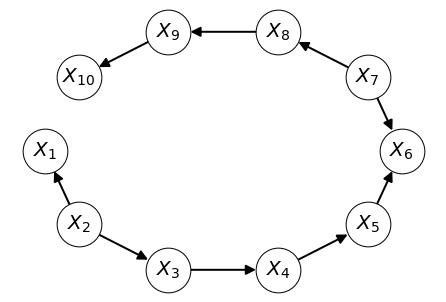

In [304]:
# collider to fork
data = create_10_nodes_collider(5, lambda: np.random.normal(0, 1, SAMPLE_SIZE), f)
scale_dict = {0: 10, 1: 8, 2: 6, 3: 4, 4: 2, 5: 1, 6: 2, 7: 4, 8: 6, 9: 8}
scale_dict = {5: 0.5}
scaled_data = rescale(data, {}, True)
#scaled_data = rescale(data, scale_dict)

nt_pred_scaled = learn_graph(ALGO)(scaled_data)
nt_pred_nx = nx.convert_matrix.from_numpy_array(nt_pred_scaled, create_using=nx.DiGraph)
labels = {node: fr"$X_{{{node + 1}}}$" for node in nt_pred_nx.nodes}
nx.draw_shell(nt_pred_nx, with_labels=True, node_size=NODE_SIZE, node_color='white', width=2, arrowsize=ARROW_SIZE, linewidths=LINEWIDTH, edgecolors='black', labels=labels, font_size=20)
plt.savefig('./collider2fork.pdf')


GES forward phase start
-------------------------
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
12305.118053822403
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
22276.73203761832
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 1. 0. 1. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 

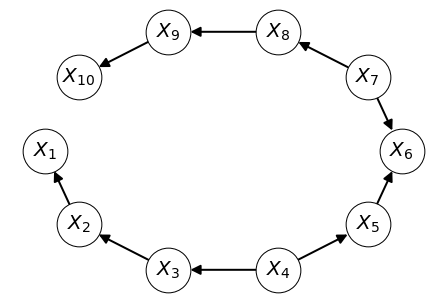

In [337]:
# collider to collider
data = create_10_nodes_collider(5, lambda: np.random.normal(0, 1, SAMPLE_SIZE), f)
scale_dict = {0: 1, 1: 2, 2: 4, 3: 6, 4: 8, 5: 6, 6: 4, 7: 2, 8: 1, 9: 0.5}
scale_dict = {4: 6}
scaled_data = rescale(data, {}, True)
#scaled_data = rescale(data, scale_dict)

nt_pred_scaled = learn_graph(ALGO)(scaled_data)
nt_pred_nx = nx.convert_matrix.from_numpy_array(nt_pred_scaled, create_using=nx.DiGraph)
labels = {node: fr"$X_{{{node + 1}}}$" for node in nt_pred_nx.nodes}
nx.draw_shell(nt_pred_nx, with_labels=True, node_size=NODE_SIZE, node_color='white', width=2, arrowsize=ARROW_SIZE, linewidths=LINEWIDTH, edgecolors='black', labels=labels, font_size=20)
plt.savefig('./collider2collider.pdf')

In [33]:
def f(x):
    return np.cos(x)

In [ ]:
data = create_10_nodes_collider(5, lambda: np.random.normal(0, 1, SAMPLE_SIZE), f)
df = pd.DataFrame(data, columns=list(range(0, 10)))
df.to_csv('./data/n-var-case/non-linear/data/data_10_collider.csv')

## Attacking SNT and DAG-GNN on Sachs Dataset

## Attack params
### Collider DAG-GNN at $X_6$
$X_5$ -> 0.5

$X_6$ -> 2

$X_7$ -> 0.2

### Fork at $X_6$
$X_5$ -> 4

$X_6$ -> 0.5

$X_7$ -> 2

### Chain flip $X_6$
$X_5$ -> 4

$X_6$ -> 0.5

$X_7$ -> 0.2

### Chain $X_2$
$X_2$ -> 10

$X_{10}$ -> 2

$X_7$ -> 0.01

### Collider $X_2$
$X_2$ -> 10

$X_{10}$ -> 0.5

$X_7$ -> 0.01

In [6]:
df = pd.read_csv('./data/real-world/sachs.data.txt', sep='\t')
df.var()

Raf       1750.965664
Mek        753.435220
Plcg       215.293647
PIP2      8744.902945
PIP3      1169.737437
Erk       8080.542215
Akt      16042.829848
PKA     183012.754944
PKC        134.373176
P38        377.210447
Jnk       1857.027108
dtype: float64

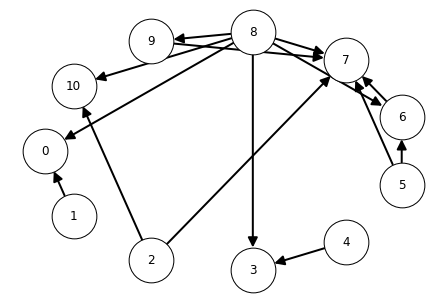

In [42]:
adj = np.loadtxt('./logs/sachs-attacks-dag-gnn/ground_truth')
adj[abs(adj) < 0.3] = 0
adj[abs(adj) >= 0.3] = 1
adj_nx = nx.convert_matrix.from_numpy_array(adj, create_using=nx.DiGraph)
nx.draw_shell(adj_nx, with_labels=True, node_size=NODE_SIZE, node_color='white', width=2, arrowsize=ARROW_SIZE, linewidths=LINEWIDTH, edgecolors='black')

In [36]:
np.savetxt('attack_2_7_10_collider', adj)

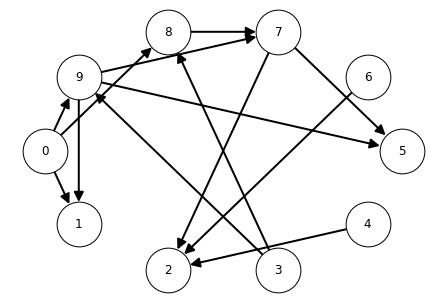

In [65]:
df = pd.read_csv('./repos/MasterThesis/notebooks/data_generation/graphs/graph_10_10.csv', index_col=0)
adj_nx = nx.convert_matrix.from_numpy_array(df.to_numpy(), create_using=nx.DiGraph)
nx.draw_shell(adj_nx, with_labels=True, node_size=NODE_SIZE, node_color='white', width=2, arrowsize=ARROW_SIZE, linewidths=LINEWIDTH, edgecolors='black')
plt.savefig('./multi_gt.pdf')

In [60]:
meta = pd.read_csv('./repos/MasterThesis/notebooks/data_generation/data/metadata.csv', index_col=0)
meta[(meta['graph_name'] == 'graph_10_10.csv') & (meta['sample_noise'] == 'gaussian')]

,sample_noise,sample_weights,f,samples,common_cause_to_confounder_fraction,nodes,edges,dataset,graph_name
0,gaussian,weight_sample,linear,2000,1.0,10,13,8d623143-9d6d-452d-a949-5533a2ad9198.csv,graph_10_10.csv
0,gaussian,weight_sample,linear,100,1.0,10,13,3f968670-a311-4500-8ca0-96498f977daa.csv,graph_10_10.csv
0,gaussian,weight_sample,linear,10000,0.0,10,13,de95ce36-a94b-4dcc-bd43-a1dfe158b31f.csv,graph_10_10.csv
0,gaussian,weight_sample,sigmoid,2000,1.0,10,13,ab448a14-7240-4856-8f0f-43d9c826118e.csv,graph_10_10.csv
0,gaussian,weight_sample,linear,100,0.5,10,13,c4b531b7-346a-491e-8380-c1cedc8f1689.csv,graph_10_10.csv
0,gaussian,weight_sample,linear,10000,0.5,10,13,0b428bda-6edf-4ca9-a37a-9f3d08cd4a04.csv,graph_10_10.csv
0,gaussian,weight_sample,sigmoid,100,1.0,10,13,e61485b3-a74d-4997-ba5a-d26e941186ae.csv,graph_10_10.csv
0,gaussian,weight_sample,sigmoid,2000,0.5,10,13,948e9a84-22bb-4def-afab-d3d6237dc21d.csv,graph_10_10.csv
0,gaussian,weight_sample,sigmoid,100,0.0,10,13,d8c73a20-5366-4392-8e7a-44c21ef5b274.csv,graph_10_10.csv
0,gaussian,weight_sample,sigmoid,10000,0.5,10,13,2c61a22b-8487-48fa-8fde-4dc4acdb4177.csv,graph_10_10.csv


In [339]:
data = pd.read_csv('repos/MasterThesis/notebooks/data_generation/data/3b4555a0-12be-441b-920d-e886f98ae54d.csv', index_col=0)
data

,1,2,4,5,6,7,8,9
0,9.546820,-2.879235,-1.082324,-1.463860,-4.126839,0.595297,-0.787983,2.124602
1,3.643203,3.696245,-1.566382,0.349828,-1.005765,-0.084423,4.451129,2.781671
2,-2.516375,5.884640,3.185667,-2.785355,0.283620,2.286294,5.039653,3.830873
3,3.440275,2.485744,-3.090154,-2.512450,0.490159,-0.154876,7.169183,-1.669700
4,-2.641674,1.044131,4.569819,-0.816492,-1.132725,5.367821,6.345810,-2.818576
...,...,...,...,...,...,...,...,...
9995,3.639221,4.522399,-3.609170,3.323225,-1.701089,5.584868,-7.025557,-4.656941
9996,0.707147,-0.000037,1.370742,-3.024119,4.859843,-2.313970,-0.147912,-2.318428
9997,-1.621949,2.801816,2.639789,1.700588,5.126683,3.622037,-1.598143,3.624303
9998,1.052862,1.607099,-0.330533,-4.222495,-0.773432,1.563400,0.020982,0.200255



GES forward phase start
-------------------------
[0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 1. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0.]
99.8187226289283
[0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 1. 0. 0. 0. 1.]
[0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0.]
197.69395106032698
[0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 1. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 1. 0. 0. 0. 1.]
[0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0.]
283.431604940336
[0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 1. 0. 0. 1. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 1. 0. 0. 0. 1.]
[0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0.]
363.89661137471194
[0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 1. 0. 1. 1. 

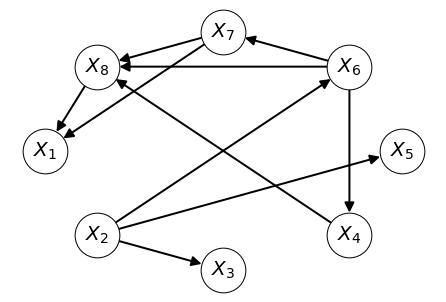

In [367]:
man_idx = list(range(data.shape[1]))
man_idx = [np.random.randint(0, data.shape[1])]
scale_dict = {i: np.random.uniform(0, 200) for i in man_idx}
scaled_data = rescale(scaled_data, {}, True)
scaled_data = rescale(data.to_numpy(), scale_dict, resacle=True)

nt_pred_scaled = learn_graph(ALGO)(scaled_data)
nt_pred_nx = nx.convert_matrix.from_numpy_array(nt_pred_scaled, create_using=nx.DiGraph)
labels = {node: fr"$X_{{{node + 1}}}$" for node in nt_pred_nx.nodes}
nx.draw_shell(nt_pred_nx, with_labels=True, node_size=NODE_SIZE, node_color='white', width=2, arrowsize=ARROW_SIZE, linewidths=LINEWIDTH, edgecolors='black', labels=labels, font_size=20)
#plt.savefig('./multi.pdf')

In [218]:
scale_dict

{0: 169.23525214997835,
 1: 88.16140682420172,
 2: 101.66783755727278,
 3: 178.78627229856562,
 4: 57.224218858526775,
 5: 11.869841266106729,
 6: 173.8003169413708,
 7: 48.92391329911443}

## SNT

In [368]:
df = pd.read_csv('./data/real-world/sachs.data.txt', sep='\t')
df_nt = df.copy()
for c in df_nt.columns:
    df.loc[:, c] = np.log(df[c])
df_nt = df_nt.to_numpy()
df_nt = rescale(df_nt, {}, True)

# chain flip
#df_nt[:, 5] *= 5
#df_nt[:, 6] *= 1.5
#df_nt[:, 7] *= 0.01

# fork
#df_nt[:, 5] *= 5
#df_nt[:, 6] *= 0.5
#df_nt[:, 7] *= 1.1

# collider
#df_nt[:, 5] *= 1.5
#df_nt[:, 6] *= 5
#df_nt[:, 7] *= 0.01

# chain flip
#df_nt[:, 8] *= 1.1
#df_nt[:, 9] *= 0.3
#df_nt[:, 10] *= 0.1

# fork
#df_nt[:, 8] *= 3
#df_nt[:, 9] *= 0.3
#df_nt[:, 10] *= 1.1

# collider
df_nt[:, 8] *= 1.1
df_nt[:, 9] *= 3
df_nt[:, 10] *= 0.1


GES forward phase start
-------------------------
 new_A = [[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1744.6150097197196
 new_A = [[0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.

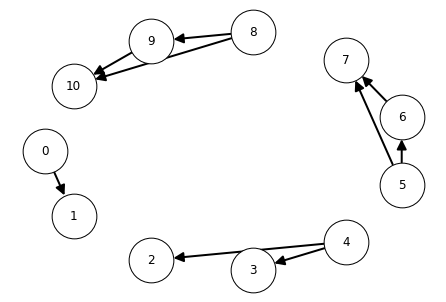

In [359]:
nt_pred = learn_graph(ALGO)(df_nt)
nt_pred[nt_pred != 0] = 1
adj_nx = nx.convert_matrix.from_numpy_array(nt_pred, create_using=nx.DiGraph)
nx.draw_shell(adj_nx, with_labels=True, node_size=NODE_SIZE, node_color='white', width=2, arrowsize=ARROW_SIZE, linewidths=LINEWIDTH, edgecolors='black')

In [298]:
gt = np.copy(nt_pred)

In [47]:
np.savetxt('attack_8_9_10_collider', nt_pred)

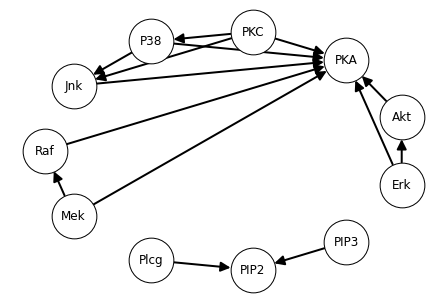

In [95]:
gt = np.loadtxt('./logs/sachs-attack-nt/ground_truth')
pred = np.loadtxt('./logs/sachs-attack-nt/attack_8_9_10_collider')
gt_df = pd.DataFrame(gt, columns=list(df.columns), index=list(df.columns))
exp_adj = gt_df.copy()
#exp_adj.iloc[8, 9] = 0
#exp_adj.iloc[9, 8] = 1
exp_adj.iloc[9, 10] = 0
exp_adj.iloc[10, 9] = 1
#exp_adj.iloc[8, 10] = 0
#exp_adj.iloc[10, 8] = 1
adj_nx = nx.convert_matrix.from_pandas_adjacency(gt_df, create_using=nx.DiGraph)
nx.draw_shell(adj_nx, with_labels=True, node_size=NODE_SIZE, node_color='white', width=2, arrowsize=ARROW_SIZE, linewidths=LINEWIDTH, edgecolors='black')

In [96]:
SHD(exp_adj.to_numpy(), pred)

5.0

In [4]:
import os

attack_2_7_10_collider
attack_5_6_7_chain
attack_2_7_10_chain
attack_5_6_7_collider
ground_truth
attack_5_6_7_fork


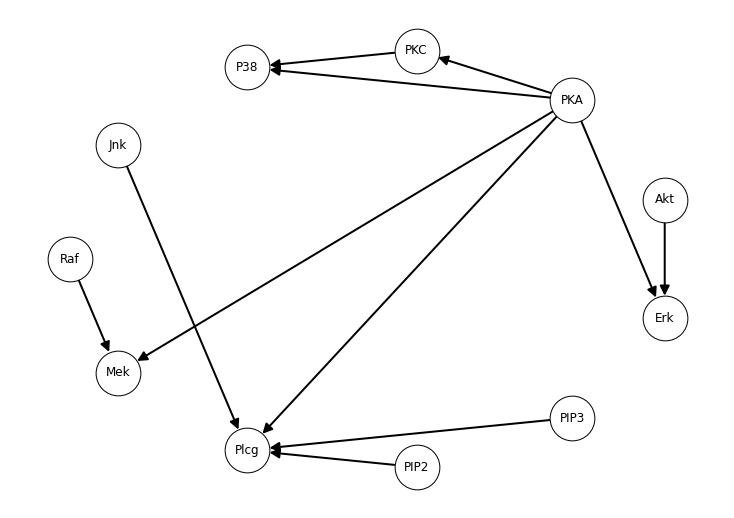

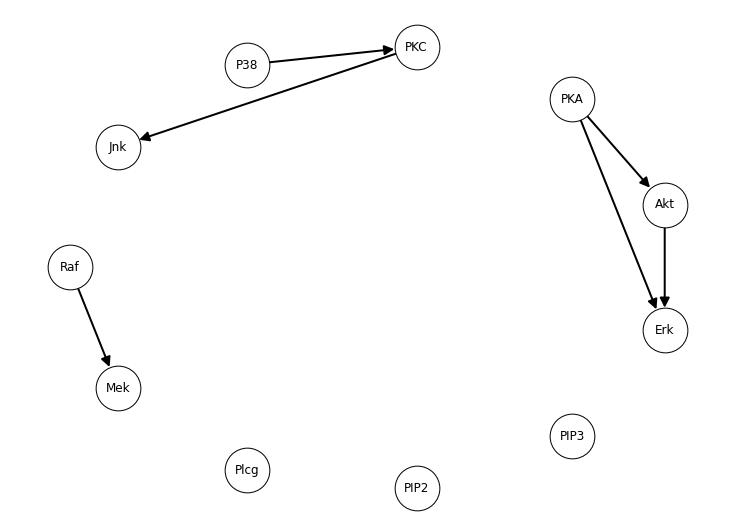

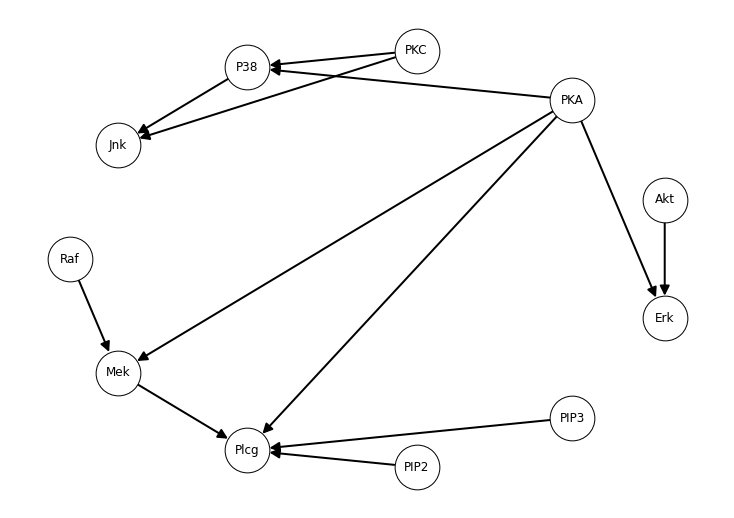

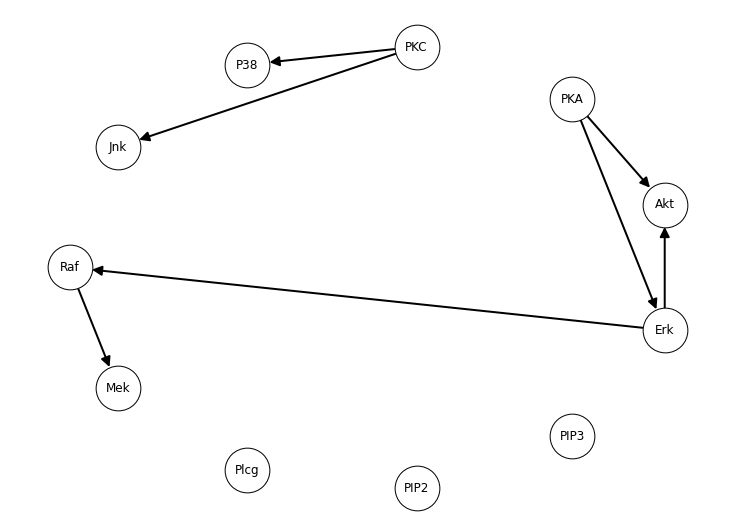

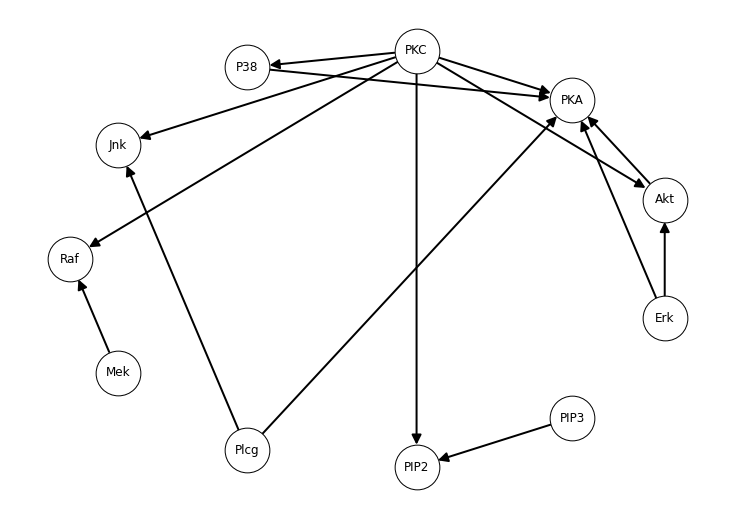

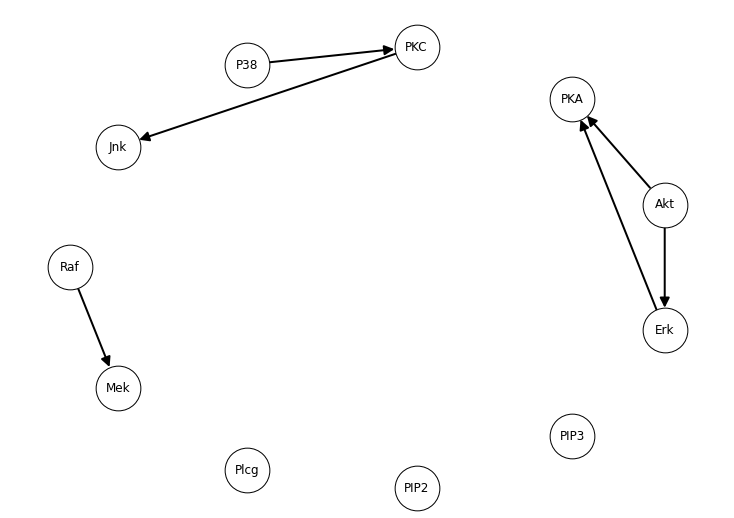

In [17]:
for filename in os.listdir('./logs/sachs-attacks-dag-gnn/'):
    adj = np.loadtxt(f'./logs/sachs-attacks-dag-gnn/{filename}')
    adj = pd.DataFrame(adj, columns=df.columns, index=df.columns)
    adj_nx = nx.convert_matrix.from_pandas_adjacency(adj, create_using=nx.DiGraph)
    fig = plt.figure(figsize=(10, 7))
    print(filename)
    nx.draw_shell(adj_nx, with_labels=True, node_size=NODE_SIZE, node_color='white', width=2, arrowsize=ARROW_SIZE, linewidths=LINEWIDTH, edgecolors='black')
    plt.savefig(f'./figures/daggnn-predictions-sachs/{filename}.svg')

In [375]:
for i, j in enumerate(df.columns):
    print(f"{i}: {j}")

0: Raf
1: Mek
2: Plcg
3: PIP2
4: PIP3
5: Erk
6: Akt
7: PKA
8: PKC
9: P38
10: Jnk


1.0
41.0


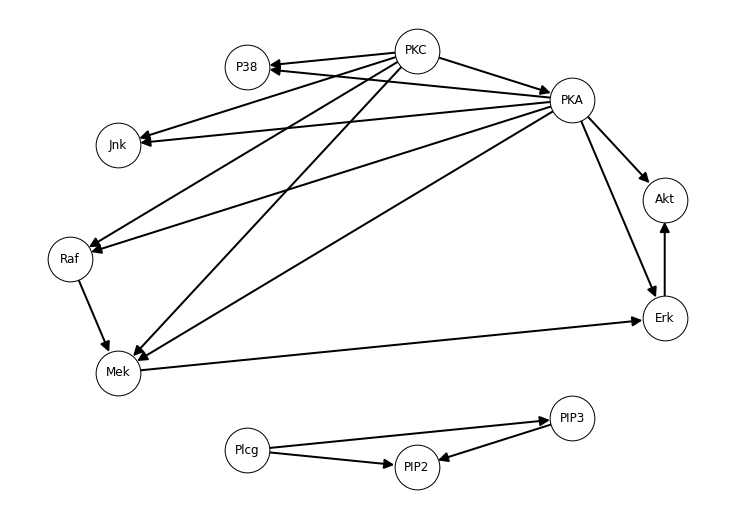

In [383]:
adj = np.load(f'../GraN-DAG/data/sachs/DAG1.npy')
exp = np.copy(adj)
pred = np.loadtxt(f'../GraN-DAG/exp/to-dag/DAG')
exp[10, 9] = 1
exp[9, 10] = 0
exp[9, 8] = 0
exp[8, 9] = 1
print(SHD(adj, exp))
print(SHD(pred, exp))
adj = pd.DataFrame(adj, columns=df.columns, index=df.columns)
adj_nx = nx.convert_matrix.from_pandas_adjacency(adj, create_using=nx.DiGraph)
fig = plt.figure(figsize=(10, 7))
nx.draw_shell(adj_nx, with_labels=True, node_size=NODE_SIZE, node_color='white', width=2, arrowsize=ARROW_SIZE, linewidths=LINEWIDTH, edgecolors='black')

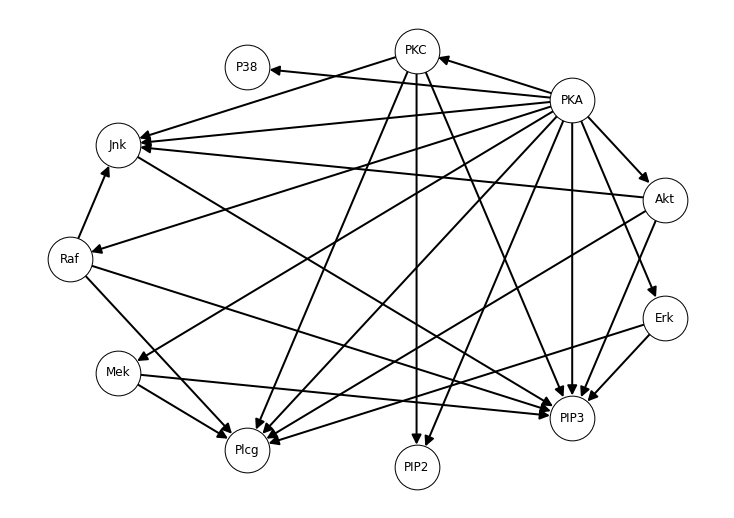

In [374]:
adj = pd.DataFrame(pred, columns=df.columns, index=df.columns)
adj_nx = nx.convert_matrix.from_pandas_adjacency(adj, create_using=nx.DiGraph)
fig = plt.figure(figsize=(10, 7))
nx.draw_shell(adj_nx, with_labels=True, node_size=NODE_SIZE, node_color='white', width=2, arrowsize=ARROW_SIZE, linewidths=LINEWIDTH, edgecolors='black')